In [45]:
# Common imports
import numpy as np
import pandas as pd
np.random.seed(42)

In [46]:
flippers = pd.read_csv("INPUTS.csv")
flippers.head()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
0,23,23,20850,1453,LOTS 13 TO 18 INC BLK L 4TH AD,0,3,154349,13755,1,0,0,13661,5,205000,0
1,18,22,10000,1330,LOT 8 BLK 266 DELTONA LAKES UN,0,3,149271,20400,1,0,0,278,3,210000,0
2,7,30,10000,1395,LOT 9 BLK 322 DELTONA LAKES UN,0,3,169016,21200,1,0,0,0,5,199900,0
3,12,20,10000,1551,LOT 9 BLK 370 DELTONA LAKES UN,0,3,167252,21200,1,0,0,142,4,186000,0
4,42,42,10250,1702,LOT 7 BLK 366 DELTONA LAKES UN,0,3,130450,24600,1,0,0,897,4,219900,0


In [47]:
flippers.shape

(401723, 16)

In [48]:
flippers.shape

(401723, 16)

In [49]:
flippers.dtypes

EFF_AGE             int64
ACT_AGE             int64
LND_SQFOOT          int64
TOT_LVG_AREA        int64
S_LEGAL            object
CONST_CLASS         int64
IMP_QUAL            int64
JV                  int64
LND_VAL             int64
NO_BULDNG           int64
NCONST_VAL          int64
DEL_VAL             int64
SPEC_FEAT_VAL       int64
MonthDifference     int64
SALE_PRC1           int64
Target_Var          int64
dtype: object

## Splitting the data into train and test sets

In [50]:
#Splitting Data
from sklearn.model_selection import train_test_split
train, test = train_test_split(flippers, test_size=0.3)

In [51]:
#Checking for missing values
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [52]:
train.isnull()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
395999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
379095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
293273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
330219,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
365838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
131932,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146867,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [54]:
#Separating Target Variable
train_y = train[['Target_Var']]
test_y = test[['Target_Var']]

#Removing Target, Profit_Loss and SALE_PRC2 from the Data Set
train_x = train.drop(['Target_Var'], axis =1)
test_x = test.drop(['Target_Var'], axis =1)   

In [55]:
train_x.shape

(281206, 15)

In [56]:
#Transforming Data Types for Numeric Columns which are categorical in nature:
#Int
flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference'
        ,'SALE_PRC1']]=flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']].astype(int)

#Str
flippers[['S_LEGAL','IMP_QUAL','CONST_CLASS']]=flippers[['S_LEGAL','IMP_QUAL'
,'CONST_CLASS']].astype(str)


In [57]:
numeric_columns = ['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
                  'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']

categorical_columns = ['S_LEGAL','IMP_QUAL','CONST_CLASS']

In [58]:
numeric_columns

['EFF_AGE',
 'ACT_AGE',
 'LND_SQFOOT',
 'TOT_LVG_AREA',
 'JV',
 'LND_VAL',
 'NO_BULDNG',
 'NCONST_VAL',
 'DEL_VAL',
 'SPEC_FEAT_VAL',
 'MonthDifference',
 'SALE_PRC1']

In [59]:
categorical_columns

['S_LEGAL', 'IMP_QUAL', 'CONST_CLASS']

In [60]:
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [61]:
# Numeric Transformer
numeric_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [62]:
#Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [63]:
#Preprocessor
preprocessor = ColumnTransformer([
    ('num',numeric_transformer,numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
  
])

In [64]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_x)

train_x

<281206x100785 sparse matrix of type '<class 'numpy.float64'>'
	with 4218090 stored elements in Compressed Sparse Row format>

In [65]:
#Fit and transform the test data
test_x = preprocessor.transform(test_x)

test_x

<120517x100785 sparse matrix of type '<class 'numpy.float64'>'
	with 1783563 stored elements in Compressed Sparse Row format>

In [66]:
type(train_x), type(test_x)

(scipy.sparse._csr.csr_matrix, scipy.sparse._csr.csr_matrix)

In [67]:
train_x.shape, test_x.shape

((281206, 100785), (120517, 100785))

In [68]:
#Retrieving the column names:
preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT', ...,
       'cat__CONST_CLASS_3', 'cat__CONST_CLASS_4', 'cat__CONST_CLASS_5'],
      dtype=object)

In [69]:
# Check if your scikit-learn version is below 1.1.1

import sklearn

sklearn.__version__

'1.1.2'

In [70]:
# Now we can retrieve the column names:

preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT', ...,
       'cat__CONST_CLASS_3', 'cat__CONST_CLASS_4', 'cat__CONST_CLASS_5'],
      dtype=object)

In [71]:
from scipy.sparse import csr_matrix

In [72]:
train_x1 = pd.DataFrame.sparse.from_spmatrix(train_x)
test_x1 = pd.DataFrame.sparse.from_spmatrix(test_x)

In [73]:
type(train_x1), type(test_x1)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [74]:
train_x1.shape, test_x1.shape

((281206, 100785), (120517, 100785))

In [75]:
#If you wanted, you can recreate the data set in the processed format:

#flippers_train_processed = pd.DataFrame(train_x1, columns=preprocessor.get_feature_names_out())

#flippers_train_processed

In [76]:
train_x1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,100775,100776,100777,100778,100779,100780,100781,100782,100783,100784
0,-1.001640,-1.193780,-0.050022,-0.730576,-0.347097,-0.207045,-0.111491,-0.086052,-0.060607,-0.532543,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.942811,-1.145726,-0.055858,3.214772,0.309583,-0.078472,-0.111491,-0.086052,-0.060607,1.857941,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.001551,-0.376854,-0.094158,-0.144875,-0.391592,-0.197313,6.617859,-0.086052,-0.060607,0.130225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.001551,0.872564,0.115833,0.666275,0.238633,0.101213,-0.111491,-0.086052,-0.060607,-0.532543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.822051,1.016727,-0.096499,-0.615528,-0.239427,0.030204,-0.111491,-0.086052,-0.060607,-0.168523,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Baseline Accuracys

In [77]:
#Majority Class
train_y.value_counts()

Target_Var
0             218646
1              62560
dtype: int64

In [78]:
#Majority Class by Percentage
train_y.value_counts()/len(train_y)

Target_Var
0             0.77753
1             0.22247
dtype: float64

### Baseline - 78%

## Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier 


In [80]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier (n_estimators = 10,random_state = 42)
#rf = ensemble.RandomForestClassifier (min_samples_leaf = 10, max_depth=5,n_estimators =100, random_state = 42)


In [81]:
rf.fit(train_x, train_y)

C:\Users\User\AppData\Local\Temp\ipykernel_11172\4293510457.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x, train_y)


RandomForestClassifier(n_estimators=10, random_state=42)

## Accuracy

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
#Predicting the train values
train_y_pred =rf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.9857933330014296

In [84]:
#Predicting the test values
test_y_pred = rf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8428603433540497

## Classification Matrix

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, test_y_pred)

array([[90508,  3324],
       [15614, 11071]], dtype=int64)

## Classification Report

In [86]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91     93832
           1       0.77      0.41      0.54     26685

    accuracy                           0.84    120517
   macro avg       0.81      0.69      0.72    120517
weighted avg       0.83      0.84      0.82    120517



## Feature Importance 

In [87]:
# There are xx columns, so there are xx values for each column's importance
# Values are rounded to three decimals

np.round(rf.feature_importances_,3)

array([0.037, 0.036, 0.044, ..., 0.002, 0.001, 0.   ])

In [88]:
for col, val in sorted (
    zip(flippers_train_processed.columns,rf.feature_importances_),
    key = lambda x: x[1],
    reverse=True,
    )[:10]:
    print(f"{col:10}{val:10.3f}")

NameError: name 'flippers_train_processed' is not defined

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
important_features_x = np.sort(flippers_train_processed)[:10]
indices_y = np.sort(rf.feature_importances_)[:10]

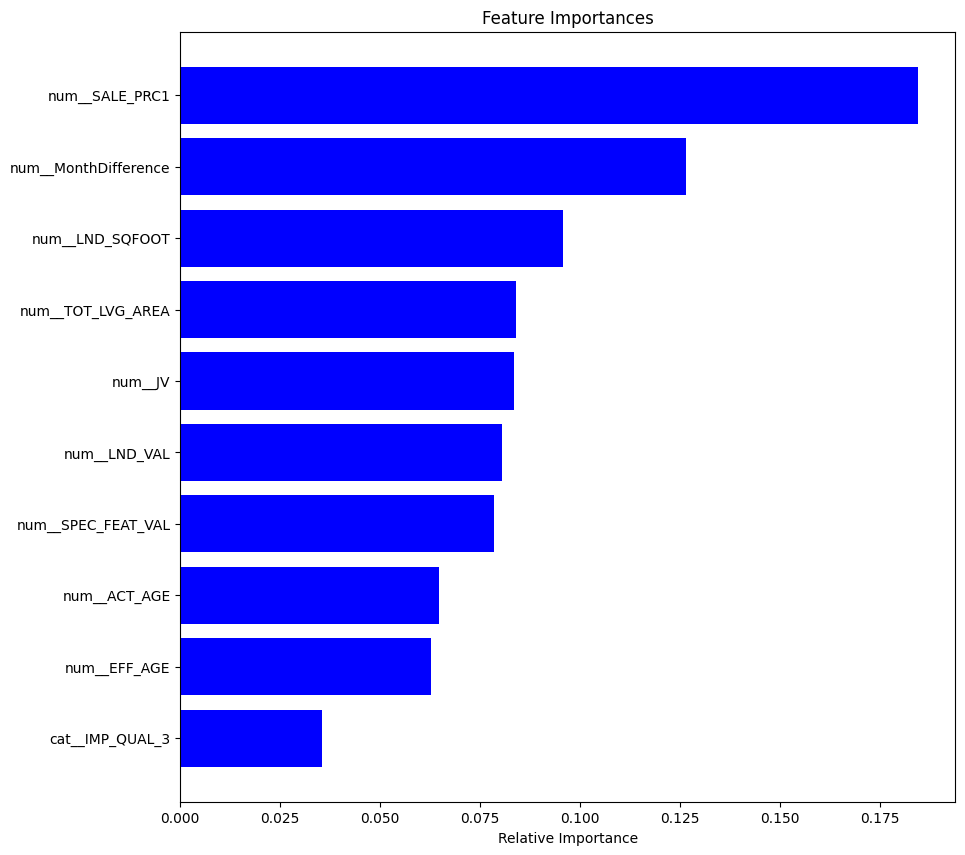

<Figure size 640x480 with 0 Axes>

In [ ]:
features = flippers_train_processed.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 
plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
fig1=plt.gcf()
plt.show()
plt.draw()
fig1.savefig('RF_Plot.png', bbox_inches ='tight')